In [1]:
from zipfile import ZipFile
file_name = "data.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("Done")

Done


In [0]:
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Bridge State Assessment in New York

## Author: Mehmed Cholakov

### Abstract:
The purpose of the study is to teach an algorithm to predict the state of the bridges with the aid of the NYS - Department of Transport Bridge Conditions. After predicting the condition, first inspect the bridge in poor condition: rating less than 5. 7 algorithms were trained.

### Introduction
The bridge is a construction designed to safely pass pedestrians, motor vehicles or trains over physical obstacles such as a passage, valley, road, railway, river, bay or other water basin. Bridges are one of the oldest engineering inventions of mankind. Their designs vary depending on the function of the bridge, the nature of the terrain, the material used for the construction and the available means of construction.

#### Question is this (classification): In what state is the bridge, knowing other variables?

### Data Analysis
The table I'm going to use is from NYS - Department of Transport Bridge Conditions, 10 variables and 17,504 records, respectively.
 - Regional code - State Department of Transportation in New York, where the bridge is located:
 - County name - The county where the bridge is located.
 - Municipality - The city or municipality in which the bridge is located.
 - Location - A telling location of the bridge linked to the junction of the US or US route, main waterway, or nearest town, village, neighborhood or topographic feature.
 - Router and reference marker - Written description of the highway or other transport feature (road, route, etc.)
 - Owner - Bridge owner (country, authority, local, other).
 - Year - The year in which the bridge was built.
 - Date - Date of the last bridge inspection.
 - Status - SD = Structural insufficiency; FO = functionally obsolete; N = Neither (federal standards).
 - Status rating - Bridge rating. The rating scale varies from 1 to 7, 7 is in a new state and an estimate of 5 or more is considered a good condition

In [0]:
bridge_data = pd.read_csv("data/bridge.csv")

In [5]:
bridge_data.head()

,Region Code,County Name,Municipality,Location,Route Carried and Reference Marker,Owner,Year Built,Date Last Inspected,SD FO Status,Condition Rating
0,1,Albany,Albany City,0.1 MI N JCT RTE 5 & I90,5 X,City,1968,2014-09-04T00:00:00,N,5.211
1,1,Albany,Albany City,JCT US 9 & PATROON CREEK,9 9 11081025,NYSDOT,1971,2015-10-27T00:00:00,N,4.750
2,1,Albany,Albany City,JCT RTE 9 & I90,9 9 11081028,NYSDOT,1971,2015-07-08T00:00:00,FO,4.833
3,1,Albany,Albany City,DOWNTOWN ALBANY,9 X,NYSDOT,1969,2015-10-14T00:00:00,FO,4.403
4,1,Albany,Albany City,0.1 MI S JCT RT 9W & I787,9W 9W11012007,NYSDOT,1966,2015-05-07T00:00:00,FO,4.328


In [6]:
bridge_data.shape

(17504, 10)

In order to be more comfortable I will change the name of the columns without spaces

In [7]:
bridge_data.columns

Index(['Region Code', 'County Name', 'Municipality', 'Location',
       'Route Carried and Reference Marker', 'Owner', 'Year Built',
       'Date Last Inspected', 'SD FO Status', 'Condition Rating'],
      dtype='object')

In [0]:
bridge_data.columns = ['region_code', 'county_name', 'municipality', 'location', 'route_carried_reference_marker', 'owner', 'year_built', 'date_last_inspected', 'status', 'condition_rating']

In [9]:
bridge_data.head()

,region_code,county_name,municipality,location,route_carried_reference_marker,owner,year_built,date_last_inspected,status,condition_rating
0,1,Albany,Albany City,0.1 MI N JCT RTE 5 & I90,5 X,City,1968,2014-09-04T00:00:00,N,5.211
1,1,Albany,Albany City,JCT US 9 & PATROON CREEK,9 9 11081025,NYSDOT,1971,2015-10-27T00:00:00,N,4.750
2,1,Albany,Albany City,JCT RTE 9 & I90,9 9 11081028,NYSDOT,1971,2015-07-08T00:00:00,FO,4.833
3,1,Albany,Albany City,DOWNTOWN ALBANY,9 X,NYSDOT,1969,2015-10-14T00:00:00,FO,4.403
4,1,Albany,Albany City,0.1 MI S JCT RT 9W & I787,9W 9W11012007,NYSDOT,1966,2015-05-07T00:00:00,FO,4.328


In [10]:
len(bridge_data.region_code.unique())

11

In [11]:
len(bridge_data.county_name.unique())

62

In [12]:
len(bridge_data.municipality.unique())

1370

In [13]:
len(bridge_data.location.unique())

15422

In [14]:
len(bridge_data.route_carried_reference_marker.unique())

12767

The first 5 variables most commonly relate to the location of the bridges. For easier and quicker training, it will remove the columns ("municipality", "location", "route_carried_reference_marker", "date_last_inspected")

In [0]:
bridge_data_ready = bridge_data.drop(["municipality", "location", "route_carried_reference_marker", "date_last_inspected"], axis = 1)

In [16]:
bridge_data_ready.head()

,region_code,county_name,owner,year_built,status,condition_rating
0,1,Albany,City,1968,N,5.211
1,1,Albany,NYSDOT,1971,N,4.750
2,1,Albany,NYSDOT,1971,FO,4.833
3,1,Albany,NYSDOT,1969,FO,4.403
4,1,Albany,NYSDOT,1966,FO,4.328


Now I'll check the preflight table info.

In [17]:
bridge_data_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17504 entries, 0 to 17503
Data columns (total 6 columns):
region_code         17504 non-null int64
county_name         17504 non-null object
owner               17504 non-null object
year_built          17504 non-null int64
status              17504 non-null object
condition_rating    17471 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 820.6+ KB


There are 33 entries in the last column - Condition_Rating. The easiest, and even I would say, the only possible method is to remove all records where these values are missing, because we will predict exactly the rating.

In [0]:
bridge_data_ready = bridge_data_ready.dropna()

In [19]:
bridge_data_ready.shape

(17471, 6)

### Data preparation
#### 1. We share the data

In [0]:
bridge_features = bridge_data_ready.drop(["condition_rating"], axis = 1)
bridge_labels = bridge_data_ready.condition_rating

In [21]:
bridge_features.shape

(17471, 5)

In [22]:
bridge_labels.shape

(17471,)

The data we will predict (bridge_labels) will classify them in 2 classes. Those that are larger than 5 - class "1" (bridges that are in good condition) and less than 5 - grade "0" (bridges that are not in good condition)

In [0]:
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) <= 5]), 0)
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) > 5]), 1)

#### 2. Convert categorical variables into indicator variables.
#### 3. Separate training and testing data.

Once I divide the data, I show the ratio of both classes in the data

In [0]:
bridge_features = pd.get_dummies(bridge_features)

In [25]:
bridge_features.shape

(17471, 101)

In [0]:
bridge_features_train, bridge_features_test, bridge_labels_train, bridge_labels_test = train_test_split(bridge_features, bridge_labels, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = bridge_labels)

In [0]:
def ploting_class(data):
    plt.bar([0, 1], [len(data[data == 0]), len(data[data == 1])])
    plt.xticks([0, 1])
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
    print("Positive cases: {:.3f}% of all".format(data.sum() / len(data) * 100))

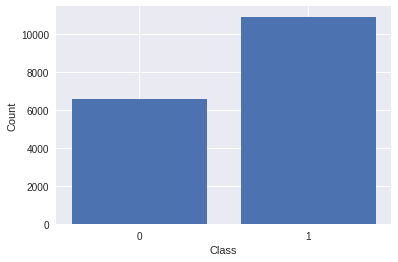

Positive cases: 62.355% of all


In [28]:
ploting_class(bridge_labels)

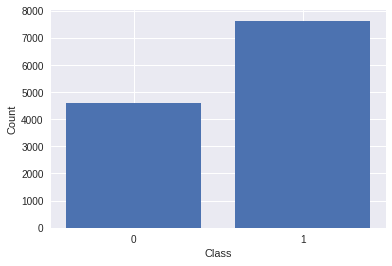

Positive cases: 62.352% of all


In [29]:
ploting_class(bridge_labels_train)

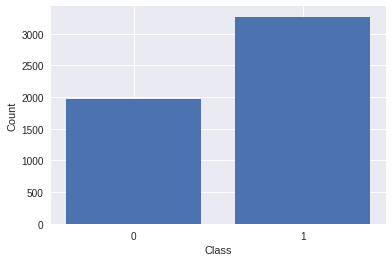

Positive cases: 62.362% of all


In [30]:
ploting_class(bridge_labels_test)

### Machine Training
#### 1. LogisticRegression
Optimize hyperparamets ("C", "max_iter") by using the GridSearchCV search network in the range:
* `C`: 0.05, 0.1, 0.3, 0.5, 1, 10
* `max_iter`: 20, 30, 40, 50, 60, 70

In [0]:
tuned_params = [{"C": [0.05, 0.1, 0.3, 0.5, 1, 10], "max_iter": [20, 30, 40, 50, 60, 70]}]

In [0]:
grid_search = GridSearchCV(LogisticRegression(fit_intercept = False), tuned_params)

In [0]:
model_logistic_regression = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_logistic_regression.best_estimator_

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=30, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### 2. GaussianSVC
I optimize hyperparamets ("C", "gama") by using the GridSearchCV search network in the range:
* `C`: 40, 50, 60, 80, 100
* `gamma`: 0.0001, 0.0005, 0.001, 0.005

In [0]:
tuned_params = [{"C": [40, 50, 60, 80, 100], "gamma": [0.0001, 0.0005, 0.001, 0.005]}]

In [0]:
grid_search = GridSearchCV(SVC(kernel = 'rbf'), tuned_params)

In [0]:
model_gaussian_svm = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_gaussian_svm.best_estimator_

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 3. Decision Tree
Optimize hyperparamets ("max_depth", "min_samples_leaf", "max_leaf_nodes") by using the GridSearchCV search network within the range:
* `max_depth`: 1, 5, 7, 14
* `min_samples_leaf`: 2, 5, 10, 12
* `max_leaf_nodes`: 5, 10, 20

In [0]:
tuned_params = [{"max_depth": [1, 5, 7, 14], "min_samples_leaf": [2, 5, 10, 12], "max_leaf_nodes": [5, 10, 20]}]

In [0]:
grid_search = GridSearchCV(DecisionTreeClassifier(), tuned_params)

In [0]:
model_decision_tree = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_decision_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Hyperparameters "min_samples_leaf" and "max_leaf_nodes" will optimize them again in a new range:
* `min_samples_leaf`: 0.5, 1, 2, 3
* `max_leaf_nodes`: 20, 25, 30, 40

In [0]:
tuned_params = [{"min_samples_leaf": [0.5, 1, 2, 3], "max_leaf_nodes": [20, 25, 30, 40]}]

In [0]:
grid_search = GridSearchCV(DecisionTreeClassifier(max_depth = 7), tuned_params)

In [0]:
model_decision_tree = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_decision_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 4. Random Forest
Optimize hyperparamets ("n_estimators", "max_depth") by using the GridSearchCV search network in the range:
* `n_estimators`: 100, 200, 300
* `max_depth`: 20, 50, 100

In [0]:
tuned_params = [{"n_estimators": [100, 200, 300], "max_depth": [20, 50, 100]}]

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [0]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Hyperparameters ("max_depth") will optimize them in a new range:
* `max_depth`: 10, 20, 30

In [0]:
tuned_params = [{"max_depth": [7, 10, 14]}]

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 200), tuned_params)

In [0]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluation of Algorithms

#### 1. F1-score
** Training data **


In [0]:
logistic_regression_classifier_score, gaussian_svm_classifier_score, tree_classifier_score, forest_classifier_score = f1_score(bridge_labels_train, model_logistic_regression.predict(bridge_features_train)), f1_score(bridge_labels_train, model_gaussian_svm.predict(bridge_features_train)), f1_score(bridge_labels_train, model_decision_tree.predict(bridge_features_train)), f1_score(bridge_labels_train, model_random_forest.predict(bridge_features_train))


print("Testing scores:")
print("Logistic Regression:", logistic_regression_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)

Testing scores:
Logistic Regression: 0.8004372087671864
Gaussian SVM: 0.812675337923999
Decision tree: 0.8074502574534358
Random forest: 0.8471915624233505


**Testing data**

In [0]:
logistic_regression_classifier_score, gaussian_svm_classifier_score, tree_classifier_score, forest_classifier_score = f1_score(bridge_labels_test, model_logistic_regression.predict(bridge_features_test)), f1_score(bridge_labels_test, model_gaussian_svm.predict(bridge_features_test)), f1_score(bridge_labels_test, model_decision_tree.predict(bridge_features_test)), f1_score(bridge_labels_test, model_random_forest.predict(bridge_features_test))


print("Testing scores:")
print("Logistic Regression:", logistic_regression_classifier_score)
print("Gaussian SVM:", gaussian_svm_classifier_score)
print("Decision tree:", tree_classifier_score)
print("Random forest:", forest_classifier_score)

Testing scores:
Logistic Regression: 0.792391744233104
Gaussian SVM: 0.7956637956637956
Decision tree: 0.7967914438502673
Random forest: 0.812


For now, I can conclude that algorithms do not do very well. The best trained person is Random forest. However, let's not forget that at first I excluded a number of categorical variables for easier and quicker learning. The question I am asking now is: How do I compensate these categorical variables so that the new variable is related to the location of the bridge and accordingly affect its condition?

The answer to my question is that it is in the following table - Average Daily Traffic NYS (AADT), namely the traffic of vehicles passing through the facility.

The table consists of 15 variables and 234,664 entries.

### First option - I will use the variables:
* `Region`
* `AADT` - Average annual daily traffic value
    
I get for each region the average AADT for all years. Traffic here is not as accurate for the gear, but in this case I do not lose recordings

In [0]:
traffic_data = pd.read_csv("data/traffic.csv")

In [34]:
traffic_data.head()

,Region,RC_ID,GIS Code,Ramp,Begin Milepoint,End Milepoint,Roadway Begin Description,Roadway End Description,Municipality,Signing,Route Number,Road Name,Year,AADT,Count Type
0,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2014,15308,FORECAST
1,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2013,15394,ACTUAL
2,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2010,14163,ACTUAL
3,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2006,17070,ACTUAL
4,1,14_0102,10036601.0,N,0.0,1.5,RTS 9 20,RT 151 JCT,EAST GREENBUSH,US,4,NaN,2004,15910,ACTUAL


In [41]:
traffic_data.shape

(234664, 15)

In [42]:
traffic_data.Region.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### Data preparation

In [0]:
traffic_region_mean = traffic_data.groupby(["Region"])["AADT"].mean()

In [44]:
traffic_region_mean

Region
1      7785.890191
2      4894.039254
3      6960.430528
4      8107.792407
5      8128.185847
6      3074.470023
7      3371.509654
8     10743.928474
9      4376.100909
10    17031.780488
11    29568.438202
Name: AADT, dtype: float64

In [0]:
for index, value in traffic_region_mean.items():
    bridge_data.loc[(bridge_data["region_code"]) == (index), "traffic_region_mean"] = value

In [46]:
bridge_data.head()

,region_code,county_name,municipality,location,route_carried_reference_marker,owner,year_built,date_last_inspected,status,condition_rating,traffic_municipality_mean,traffic_region_mean
0,1,Albany,albany,0.1 MI N JCT RTE 5 & I90,5 X,City,1968,2014-09-04T00:00:00,N,5.211,16261.549645,7785.890191
1,1,Albany,albany,JCT US 9 & PATROON CREEK,9 9 11081025,NYSDOT,1971,2015-10-27T00:00:00,N,4.750,16261.549645,7785.890191
2,1,Albany,albany,JCT RTE 9 & I90,9 9 11081028,NYSDOT,1971,2015-07-08T00:00:00,FO,4.833,16261.549645,7785.890191
3,1,Albany,albany,DOWNTOWN ALBANY,9 X,NYSDOT,1969,2015-10-14T00:00:00,FO,4.403,16261.549645,7785.890191
4,1,Albany,albany,0.1 MI S JCT RT 9W & I787,9W 9W11012007,NYSDOT,1966,2015-05-07T00:00:00,FO,4.328,16261.549645,7785.890191


In [0]:
bridge_data_ready = bridge_data.drop(["municipality", "location", "route_carried_reference_marker", "date_last_inspected"], axis = 1)

In [48]:
bridge_data_ready.head()

,region_code,county_name,owner,year_built,status,condition_rating,traffic_municipality_mean,traffic_region_mean
0,1,Albany,City,1968,N,5.211,16261.549645,7785.890191
1,1,Albany,NYSDOT,1971,N,4.750,16261.549645,7785.890191
2,1,Albany,NYSDOT,1971,FO,4.833,16261.549645,7785.890191
3,1,Albany,NYSDOT,1969,FO,4.403,16261.549645,7785.890191
4,1,Albany,NYSDOT,1966,FO,4.328,16261.549645,7785.890191


In [49]:
bridge_data_ready = bridge_data_ready.dropna()
bridge_data_ready.shape

(14176, 8)

In [0]:
bridge_features = bridge_data_ready.drop(["condition_rating"], axis = 1)
bridge_labels = bridge_data_ready.condition_rating

In [0]:
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) <= 5]), 0)
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) > 5]), 1)

In [0]:
bridge_features = pd.get_dummies(bridge_features)

In [53]:
bridge_features.shape

(14176, 93)

In [0]:
bridge_features = MinMaxScaler(feature_range = (0, 1)).fit_transform(bridge_features)

In [0]:
bridge_features_train, bridge_features_test, bridge_labels_train, bridge_labels_test = train_test_split(bridge_features, bridge_labels, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = bridge_labels)

### Machine Training

#### Random Forest
Optimize hyperparamets ("n_estimators", "max_depth") by using the GridSearchCV search network in the range:
* `n_estimators`: 200, 300, 400
* `max_depth`: 7, 10, 14

In [0]:
tuned_params = [{"n_estimators": [200, 300, 400], "max_depth": [7, 10, 14]}]

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [0]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Hyperparameter ("n_estimators") will optimize it in a new range:
* `n_estimators`: 400, 600, 800

In [0]:
tuned_params = [{"n_estimators": [400, 600, 800]}]

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(max_depth = 14), tuned_params)

In [0]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluating Random Forest

#### 1. F1-score
**Training data**

In [0]:
forest_classifier_score = f1_score(bridge_labels_train, model_random_forest.predict(bridge_features_train))
print("Random forest:", forest_classifier_score)

Random forest: 0.8549392237921886


**Testing data**

In [0]:
forest_classifier_score = f1_score(bridge_labels_test, model_random_forest.predict(bridge_features_test))
print("Random forest:", forest_classifier_score)

Random forest: 0.8121142529065596



### Second variant - I will use the variables:
* 'municipality'
* `AADT` - Average annual daily traffic value

I get for each municipality the average AADT for all years. Here, traffic is better described, but I lose about 3,300 entries

To be able to unify them by municipalities I make the records in both tables with small symbols

### Data preparation

In [0]:
bridge_data.municipality = bridge_data.municipality.str.lower()

In [0]:
bridge_data.municipality = bridge_data.municipality.str.partition(' ')[0]

In [0]:
traffic_municipality_mean = traffic_data.groupby(["Municipality"])["AADT"].mean()

In [0]:
traffic_municipality_mean.index = traffic_municipality_mean.index.str.lower()

In [37]:
len(traffic_municipality_mean.unique())

1270

In [0]:
for index, value in traffic_municipality_mean.items():
    bridge_data.loc[(bridge_data["municipality"]) == (index), "traffic_municipality_mean"] = value

In [39]:
len(bridge_data.traffic_municipality_mean.unique())

979

In [0]:
bridge_data_ready = bridge_data.drop(["municipality", "location", "route_carried_reference_marker", "date_last_inspected", "traffic_region_mean"], axis = 1)

In [0]:
bridge_data_ready = bridge_data_ready.dropna()

In [58]:
bridge_data.shape

(17504, 12)

In [59]:
bridge_data_ready.head()

,region_code,county_name,owner,year_built,status,condition_rating,traffic_municipality_mean
0,1,Albany,City,1968,N,5.211,16261.549645
1,1,Albany,NYSDOT,1971,N,4.750,16261.549645
2,1,Albany,NYSDOT,1971,FO,4.833,16261.549645
3,1,Albany,NYSDOT,1969,FO,4.403,16261.549645
4,1,Albany,NYSDOT,1966,FO,4.328,16261.549645


In [60]:
bridge_data_ready.shape

(14176, 7)

In [0]:
bridge_features = bridge_data_ready.drop(["condition_rating"], axis = 1)
bridge_labels = bridge_data_ready.condition_rating

In [0]:
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) <= 5]), 0)
bridge_labels = bridge_labels.replace(np.array(bridge_labels[(bridge_labels) > 5]), 1)

In [63]:
bridge_features = pd.get_dummies(bridge_features)
bridge_features.shape

(14176, 92)

In [0]:
bridge_features = MinMaxScaler(feature_range = (0, 1)).fit_transform(bridge_features)

In [0]:
bridge_features_train, bridge_features_test, bridge_labels_train, bridge_labels_test = train_test_split(bridge_features, bridge_labels, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = bridge_labels)

### Machine Training

#### Random Forest
Optimize hyperparamets ("n_estimators", "max_depth") by using the GridSearchCV search network in the range:
* `n_estimators`: 300, 400, 500
* `max_depth`: 10, 20, 30

In [0]:
tuned_params = [{"n_estimators": [300, 400, 500], "max_depth": [10, 20, 30]}]

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(), tuned_params)

In [0]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Hyperparameter ("n_estimators") will optimize it in a new range:
* `n_estimators`: 200, 300, 400

In [0]:
tuned_params = [{"n_estimators": [200, 300, 400]}]

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(max_depth = 20), tuned_params)

In [0]:
model_random_forest = grid_search.fit(bridge_features_train, bridge_labels_train)

In [0]:
model_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluating Random Forest

#### 2. F1-score
**Training data**

In [0]:
forest_classifier_score = f1_score(bridge_labels_train, model_random_forest.predict(bridge_features_train))
print("Random forest:", forest_classifier_score)

Random forest: 0.9191508581752484


**Teating data**

In [0]:
forest_classifier_score = f1_score(bridge_labels_test, model_random_forest.predict(bridge_features_test))
print("Random forest:", forest_classifier_score)

Random forest: 0.819500262100297


** After adding the new variable, the score increased by 1%, but the lost data increased the variance to 10%. At the very beginning of the training, we saw that Random forest variance was about 4% higher, and Decision Tree almost did not exist, and accuracy was 1% smaller. So I'm going to teach the Decision Tree on the new table. **


### Machine Training

### Decision Tree
Optimize hyperparamets ("max_depth", "min_samples_leaf", "max_leaf_nodes") by using the GridSearchCV search network within the range:
* `max_depth`: 1, 5, 7, 14
* `min_samples_leaf`: 0.5, 1, 2, 3
* `max_leaf_nodes`: 20, 25, 30, 40

In [0]:
tuned_params = [{"max_depth": [1, 5, 7, 14], "min_samples_leaf": [0.5, 1, 2, 3], "max_leaf_nodes": [20, 25, 30, 40]}]

In [0]:
grid_search = GridSearchCV(DecisionTreeClassifier(), tuned_params)

In [0]:
model_decision_tree = grid_search.fit(bridge_features_train, bridge_labels_train)

In [73]:
model_decision_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Evaluating the Decision Tree

#### 2. F1-score
**Training data**

In [74]:
tree_classifier_score = f1_score(bridge_labels_train, model_decision_tree.predict(bridge_features_train))
print("Decision tree:", tree_classifier_score)

Decision tree: 0.8233110616184112


#### Testing data

In [75]:
tree_classifier_score = f1_score(bridge_labels_test, model_decision_tree.predict(bridge_features_test))
print("Decision tree:", tree_classifier_score)

Decision tree: 0.8153526970954356


### Conclusion:
From the trained algorithms, the best algorithm is Decisin Tree. We have no variance. To assume that human error is about 5%, therefore we have about 13% Bias to improve it will require more variables.